In [ ]:
!pip install git+https://github.com/jacobgil/keras-grad-cam.git

  Cloning https://github.com/jacobgil/keras-grad-cam.git to /tmp/pip-req-build-exnt5f5t
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/keras-grad-cam.git /tmp/pip-req-build-exnt5f5t
  Resolved https://github.com/jacobgil/keras-grad-cam.git to commit 5a88cdcd044816e10ddeb8a72b70bb4b1f101ab1
ERROR: git+https://github.com/jacobgil/keras-grad-cam.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 92.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0


In [ ]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.image import show_cam_on_image

In [ ]:
!pip install tensorflow
!pip install numpy --upgrade # Upgrade NumPy
!pip install h5py  # Ensure h5py is installed
!pip install tensorflow-io

  Using cached numpy-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.2.0 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.0 which is incompatible.
langchain 0.3.9 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.2.0 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.2.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.0 which is incompatibl

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import additional models
from tensorflow.keras.applications import ResNet50, InceptionV3, DenseNet121, EfficientNetB0
from tensorflow.keras.applications import VGG16

# Paths to directories
base_dir = "/content/drive/MyDrive/Breast Cancer Detection.v1i.folder"
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [ ]:


# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1017 images belonging to 3 classes.
Found 290 images belonging to 3 classes.
Found 137 images belonging to 3 classes.


# Importation du modèle souhaité
from tensorflow.keras.applications import ResNet50, InceptionV3, DenseNet121, EfficientNetB0

# Choix du modèle (exemple avec ResNet50)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Function to create and train model
def create_model(base_model_func, base_model_name):
    base_model = base_model_func(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
    ])

    model.summary()

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
 # Train the model
    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        epochs=20
    )

    # Evaluate on test data
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"{base_model_name} - Test Accuracy: {test_acc:.4f}")

    return model, test_acc, history


Training ResNet50
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,433,283 (138.98 MB)

 Trainable params: 12,845,571 (49.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 865s 22s/step - accuracy: 0.4941 - loss: 6.5046 - val_accuracy: 0.6655 - val_loss: 0.8905
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 504ms/step - accuracy: 0.5633 - loss: 1.0038 - val_accuracy: 0.5379 - val_loss: 0.9924
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 445ms/step - accuracy: 0.5280 - loss: 1.0166 - val_accuracy: 0.6517 - val_loss: 0.9044
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 417ms/step - accuracy: 0.6246 - loss: 0.9854 - val_accuracy: 0.6828 - val_loss: 0.8133
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 445ms/step - accuracy: 0.6178 - loss: 0.9388 - val_accuracy: 0.6724 - val_loss: 0.7979
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 444ms/step - accuracy: 0.6160 - loss: 0.9409 - val_accuracy: 0.6690 - val_loss: 0.8874
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 438ms/step - accuracy: 0.6261 - loss: 0.9828 - val_accuracy: 0.6724 - val_loss: 0.8423
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 444ms/step - accuracy: 0.5967 - loss: 0.9696 - val_accuracy: 0.6138

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,356,899 (108.17 MB)

 Trainable params: 6,554,115 (25.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.5617 - loss: 10.0298 - val_accuracy: 0.7379 - val_loss: 0.9124
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 431ms/step - accuracy: 0.6635 - loss: 0.7609 - val_accuracy: 0.7414 - val_loss: 0.5081
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 428ms/step - accuracy: 0.7209 - loss: 0.6278 - val_accuracy: 0.7379 - val_loss: 0.4832
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 428ms/step - accuracy: 0.7522 - loss: 0.5514 - val_accuracy: 0.7414 - val_loss: 0.5017
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 414ms/step - accuracy: 0.7508 - loss: 0.5512 - val_accuracy: 0.7414 - val_loss: 0.4730
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 442ms/step - accuracy: 0.7398 - loss: 0.5171 - val_accuracy: 0.7414 - val_loss: 0.4705
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 441ms/step - accuracy: 0.7760 - loss: 0.5100 - val_accuracy: 0.7552 - val_loss: 0.4670
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 433ms/step - accuracy: 0.7425 - loss: 0.5308 - val_accura

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,460,547 (51.35 MB)

 Trainable params: 6,423,043 (24.50 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5397 - loss: 6.3234 - val_accuracy: 0.7552 - val_loss: 0.5632
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 437ms/step - accuracy: 0.7269 - loss: 0.6394 - val_accuracy: 0.7207 - val_loss: 0.5431
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 462ms/step - accuracy: 0.7535 - loss: 0.5679 - val_accuracy: 0.7586 - val_loss: 0.4929
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 443ms/step - accuracy: 0.7680 - loss: 0.5085 - val_accuracy: 0.7552 - val_loss: 0.4777
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 440ms/step - accuracy: 0.7822 - loss: 0.4986 - val_accuracy: 0.7862 - val_loss: 0.4632
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 426ms/step - accuracy: 0.7378 - loss: 0.5092 - val_accuracy: 0.7759 - val_loss: 0.5108
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 435ms/step - accuracy: 0.7775 - loss: 0.4917 - val_accuracy: 0.8138 - val_loss: 0.4221
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 450ms/step - accuracy: 0.7643 - loss: 0.4996 - val_accurac

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       8,028,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,078,246 (46.07 MB)

 Trainable params: 8,028,675 (30.63 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4624 - loss: 8.5191 - val_accuracy: 0.5862 - val_loss: 0.9937
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 424ms/step - accuracy: 0.6016 - loss: 1.0103 - val_accuracy: 0.5862 - val_loss: 0.9408
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 424ms/step - accuracy: 0.6076 - loss: 0.9995 - val_accuracy: 0.5862 - val_loss: 0.9227
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 411ms/step - accuracy: 0.5818 - loss: 0.9922 - val_accuracy: 0.5862 - val_loss: 0.9383
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 423ms/step - accuracy: 0.5980 - loss: 0.9777 - val_accuracy: 0.5862 - val_loss: 0.9586
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 423ms/step - accuracy: 0.5966 - loss: 0.9786 - val_accuracy: 0.5862 - val_loss: 0.9499
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.5932 - loss: 0.9981 - val_accuracy: 0.5862 - val_loss: 0.9632
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 425ms/step - accuracy: 0.6202 - loss: 0.9728 - val_accurac

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,467 (68.38 MB)

 Trainable params: 3,211,779 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.4740 - loss: 2.3228 - val_accuracy: 0.6448 - val_loss: 0.7690
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 462ms/step - accuracy: 0.5878 - loss: 0.8588 - val_accuracy: 0.7828 - val_loss: 0.6230
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 476ms/step - accuracy: 0.6662 - loss: 0.7387 - val_accuracy: 0.7655 - val_loss: 0.5941
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 474ms/step - accuracy: 0.5965 - loss: 0.7880 - val_accuracy: 0.8000 - val_loss: 0.5422
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 543ms/step - accuracy: 0.6767 - loss: 0.6898 - val_accuracy: 0.8000 - val_loss: 0.5184
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 460ms/step - accuracy: 0.6666 - loss: 0.6885 - val_accuracy: 0.7897 - val_loss: 0.5205
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 465ms/step - accuracy: 0.7209 - loss: 0.6421 - val_accuracy: 0.7828 - val_loss: 0.4847
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 450ms/step - accuracy: 0.7006 - loss: 0.6465 - val_accurac

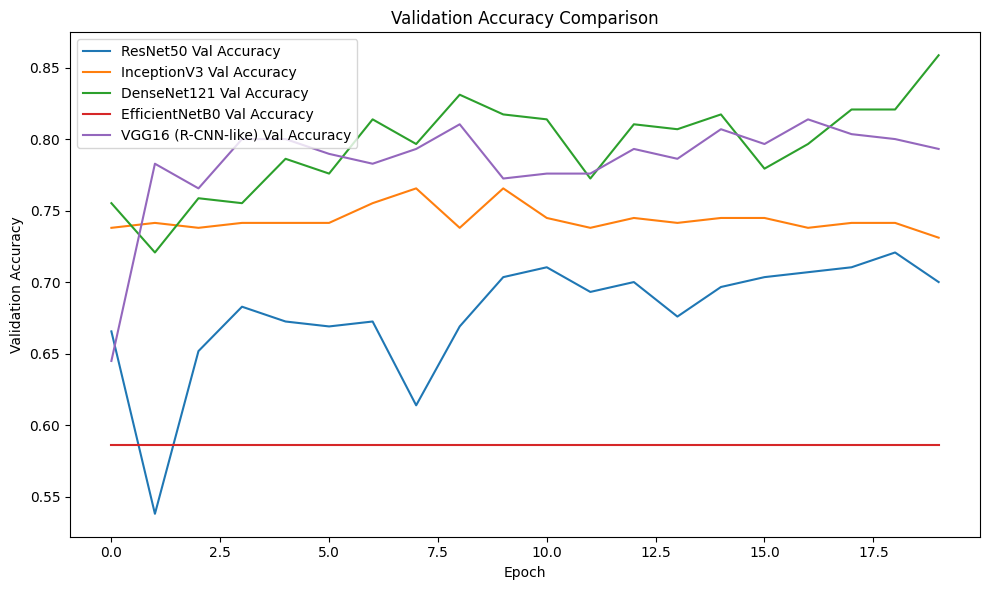

In [ ]:


# List of models to compare
models_to_compare = [
    (ResNet50, "ResNet50"),
    (InceptionV3, "InceptionV3"),
    (DenseNet121, "DenseNet121"),
    (EfficientNetB0, "EfficientNetB0"),
    (VGG16, "VGG16 (R-CNN-like)")
]

# Store results
model_results = {}

# Compare models
for model_func, model_name in models_to_compare:
    print(f"\nTraining {model_name}")
    model, test_acc, history = create_model(model_func, model_name) # This line and the following lines should be indented
    model_results[model_name] = {
        'model': model,
        'test_accuracy': test_acc,
        'history': history
    }

# Plotting accuracy comparison
plt.figure(figsize=(10, 6))
for model_name, result in model_results.items():
    plt.plot(result['history'].history['val_accuracy'], label=f'{model_name} Val Accuracy')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install tf-keras-vis tensorflow

  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.8 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0


In [ ]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize


Grad-CAM Visualization for Best Model: DenseNet121
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


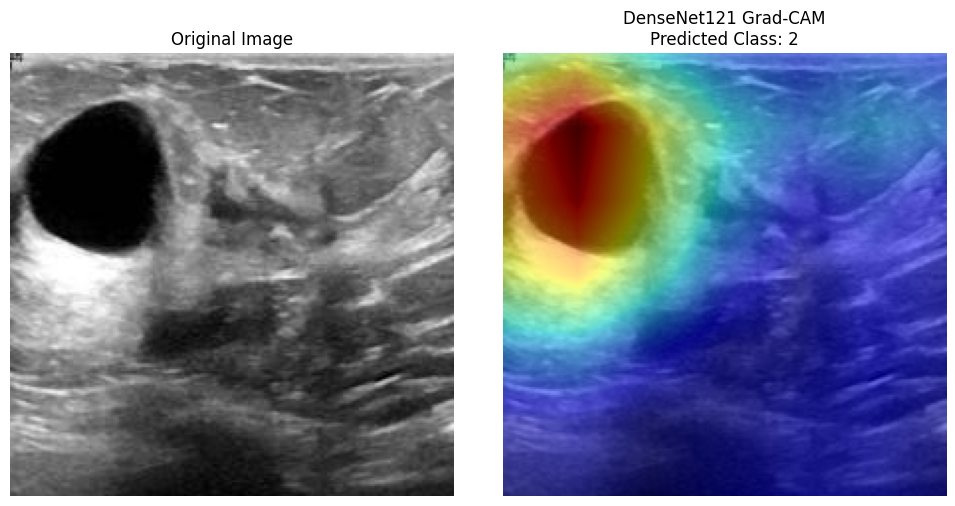

In [ ]:
def get_grad_cam(model, image, class_index):
    gradcam = Gradcam(model, model_modifier=lambda m: m.layers[0], clone=False)

    def loss(output):
        class_index_clipped = min(class_index, output.shape[1] - 1)
        return output[:, class_index_clipped]

    cam = gradcam(loss, seed_input=image, penultimate_layer=-1)
    cam = normalize(cam)

    return cam[0]

# Visualize Grad-CAM for the best performing model
best_model_name = max(model_results, key=lambda k: model_results[k]['test_accuracy'])
best_model = model_results[best_model_name]['model']

print(f"\nGrad-CAM Visualization for Best Model: {best_model_name}")

test_image, test_label = next(test_generator)
predicted_class = np.argmax(best_model.predict(test_image))

# Access output shape using best_model.layers[-1].output.shape instead of output_shape
predicted_class = min(predicted_class, best_model.layers[-1].output.shape[-1] - 1)

heatmap = get_grad_cam(best_model, test_image[0:1], predicted_class)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(test_image[0])
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(test_image[0])
plt.imshow(heatmap, alpha=0.5, cmap='jet')
plt.title(f'{best_model_name} Grad-CAM\nPredicted Class: {predicted_class}')
plt.axis('off')

plt.tight_layout()
plt.show()